# Automatization tool for event-study coefficients plots

There are at least three ways to approach this task. The first one is to use the python package named *tikzplotlib*, which allows you to export a *matplotlib* plot to a .tex file that you can later just call in $\LaTeX$. I thought of this option given that the examples you provided me were based on the $\LaTeX$ package called *pgfplots*, which is required to be loaded in
your document and loads *tikz* by itself. This option gives you freedom to customize your graphics's style and make changes without manipulating a rigid code in *tikz* manually. Also, given that one of the goals of this task is to achieve better-looking versions of the graphs, this one can be combined with packages like *Seaborn* to give them a ggplot2 style or a similar one available in it. 

The second one also requires to load *pgfplots* in $\LaTeX$. In this option we create a plot template in *tikz* (which would be completely rigid and difficult to modify for style changes), then fill it with the data in Python (which is kind of complicated given it's output is needed to be text) and then export it to a .txt file, then change the extension to .tex. The other approach to this option is to create a plot template in $\LaTeX$ and just change the dataset in the document calling it from the files in Overleaf or your offline files in case you use MikTeX or similar programs. It would be easier but it wouldn't be possible to generate a specific .tex file for each graph to just call it in the document. If we take into account that this one requires *pgfplots* as well as option 1, I would recommend the latter which is more automatic and easier, nevertheless, it's a pretty much viable option. 

The third and last one is to code a *tikz* template from scratch without *pgfplots*. It'll be tedious and inefficient given that I suppose you're already using *pgfplots* in your documents, so I'll proceed with option 1, but please feel free to tell me to code the other options, I'm already familiarized with option 1 and 2. 

First, we have to make sure you have the needed Python packages, so we proceed to install them in case you don't have them already. 

In [1]:
!pip install tikzplotlib --user
!pip install numpy --user
!pip install matplotlib --user
!pip install pandas --user

Now, we import the required packages and a similar style to the one presented in the example

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We load the event-study coefficients dataset. This command assumes the dataset it's located in the same folder as this Jupyter notebook. 

In [3]:
df = pd.read_csv('coeff.csv', sep = ',')

In [4]:
df

,time,coeff,se
0,-12,0.005,0.010
1,-11,0.002,0.015
2,-10,0.004,0.001
3,-9,0.003,0.008
4,-8,0.002,0.007
5,-7,0.001,0.004
6,-6,0.005,0.005
7,-5,0.004,0.004
8,-4,0.002,0.003
9,-3,0.005,0.008


Now, we proceed to plot. We declare the x, y variables to plot the line, finally. Then, we plot the confidence interval by specifying the error variable and filling inbetween those data points. Take into account the plotter assumes the errors are symmetrical, if this is not the case, you've got to define separate variables for the upper and lower limits. Finally, we label the axis. Please, specify in the next variable what do this coefficients correspond to, i.e.: sales, employment, etc. Also, how frequently spaced you want the variable to be. 

In [9]:
coefficients = 'Sales'
xticksfrequency = 2
alpha = 0.5 # How translucent the confidence interval is

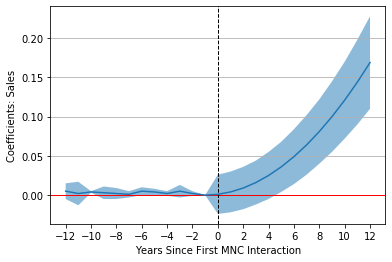

In [11]:
plt.axhline(y=0, color='r', linestyle='-', linewidth = 1) #We create a vertical black dashed line at 0 as showed in the example. 
plt.axvline(x=0, color='black', linestyle='--', linewidth = 1) # We create a horizontal red line at the origin as showed in the example.
plt.plot(df['time'], df['coeff']) # (x, y, circles, standard error)
plt.fill_between(df['time'], df['coeff'] - df['se'], df['coeff'] + df['se'], alpha = alpha)
plt.grid(True, which='major', axis='y') # Optional horizontal lines
plt.xlabel('Years Since First MNC Interaction')
plt.ylabel('Coefficients: {}'.format(coefficients))
plt.xticks(np.arange(min(df['time']), max(df['time']) + 1, xticksfrequency))

import tikzplotlib

tikzplotlib.save("Event-study coefficients_ {}.tex".format(coefficients))